In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('covid_time_series.csv')

In [10]:
df.describe(include="all")

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
count,325,487,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,...,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
unique,323,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Diamond Princess,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,30.580962,-33.601551,1.139630,1.340862,1.932238,2.944559,4.349076,6.010267,...,298.137577,320.521561,343.831622,372.745380,404.809035,441.293634,498.373717,558.862423,625.305955,689.845996
std,NaN,NaN,19.645817,81.064011,20.170391,20.253507,25.229268,35.129844,49.109575,66.178567,...,3248.509243,3309.559050,3380.171621,3463.800169,3561.212709,3693.726599,3886.851115,4121.144328,4397.961371,4658.551576
min,NaN,NaN,-41.454500,-157.858400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,24.000000,-91.733100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,37.545500,-73.794900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,4.000000
75%,NaN,NaN,42.171200,22.380900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17.000000,26.000000,31.000000,39.000000,56.000000,68.000000,80.500000,92.000000,125.000000,138.500000


In [11]:
df = df.drop(columns=['Province/State','Lat','Long'])

In [32]:
df.head(30)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,Thailand,2,3,5,7,8,8,14,14,14,...,75,82,114,147,177,212,272,322,411,599
1,Japan,2,1,2,2,4,4,7,7,11,...,701,773,839,825,878,889,924,963,1007,1086
2,Singapore,0,1,3,3,4,5,7,7,10,...,200,212,226,243,266,313,345,385,432,455
3,Nepal,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,Malaysia,0,0,0,3,4,4,4,7,8,...,197,238,428,566,673,790,900,1030,1183,1306
5,Canada,0,0,0,0,0,0,1,1,1,...,64,64,73,103,103,186,231,271,424,424
6,Australia,0,0,0,0,3,4,4,4,4,...,92,112,134,171,210,267,307,353,436,533
7,Australia,0,0,0,0,1,1,1,1,2,...,36,49,57,71,94,121,121,121,229,296
8,Australia,0,0,0,0,0,0,0,1,3,...,35,46,61,68,78,94,144,184,221,221
9,Cambodia,0,0,0,0,0,1,1,1,1,...,5,7,7,7,33,35,37,51,53,84


In [46]:
#Drop cases with more than 70% cases as 0
ctr=0
print(len(df))
for column in df.iloc[:,1:]:
    count = df[column].astype(bool).sum(axis=0)
    if(count<(len(df)*0.3)):
        df = df.drop(columns=[column])

487


In [47]:
df.head(10)

,Country/Region,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,Thailand,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599
1,Japan,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086
2,Singapore,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455
3,Nepal,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
4,Malaysia,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306
5,Canada,12,13,21,21,27,32,32,39,46,64,64,73,103,103,186,231,271,424,424
6,Australia,22,22,26,28,38,48,55,65,65,92,112,134,171,210,267,307,353,436,533
7,Australia,10,10,10,11,11,15,18,21,21,36,49,57,71,94,121,121,121,229,296
8,Australia,11,13,13,13,15,15,18,20,20,35,46,61,68,78,94,144,184,221,221
9,Cambodia,1,1,1,1,2,2,2,3,3,5,7,7,7,33,35,37,51,53,84


In [52]:
#Country-wise Data
c_wise = df.groupby('Country/Region').sum().reset_index().sort_values(by='3/4/20',ascending=False)
c_wise

,Country/Region,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
33,China,80386,80537,80690,80770,80823,80860,80887,80921,80932,80945,80977,81003,81033,81058,81102,81156,81250,81305,81397
87,"Korea, South",5621,6088,6593,7041,7314,7478,7513,7755,7869,7979,8086,8162,8236,8320,8413,8565,8652,8799,8897
81,Italy,3089,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157,24747,27980,31506,35713,41035,47021,53578,59138
77,Iran,2922,3513,4747,5823,6566,7161,8042,9000,10075,11364,12729,13938,14991,16169,17361,18407,19644,20610,21638
40,Cruise Ship,706,706,696,696,696,696,696,696,696,696,696,696,696,696,712,712,712,712,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,"Gambia, The",0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
60,Gabon,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,4,5
57,Fiji,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2
56,Ethiopia,0,0,0,0,0,0,0,0,0,1,1,1,5,5,6,6,9,9,11


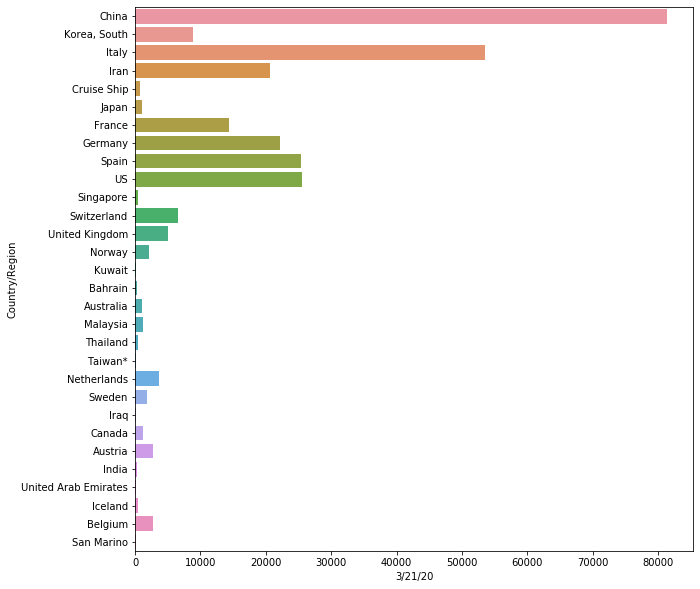

In [81]:
#Plot graph
plt.figure(figsize=(10,10))
sns.barplot(y=c_wise['Country/Region'][:30],x=c_wise['3/21/20'])

In [82]:
#Date-wise Graph
d_wise = (c_wise.T)
d_wise.columns = d_wise.iloc[0]
d_wise = d_wise.iloc[1:]
d_wise = d_wise.reset_index()
d_wise

Country/Region,index,China,"Korea, South",Italy,Iran,Cruise Ship,Japan,France,Germany,Spain,...,Guyana,Guinea,Guatemala,Grenada,Ghana,"Gambia, The",Gabon,Fiji,Ethiopia,Zimbabwe
0,3/4/20,80386,5621,3089,2922,706,331,288,262,222,...,0,0,0,0,0,0,0,0,0,0
1,3/5/20,80537,6088,3858,3513,706,360,380,482,259,...,0,0,0,0,0,0,0,0,0,0
2,3/6/20,80690,6593,4636,4747,696,420,656,670,400,...,0,0,0,0,0,0,0,0,0,0
3,3/7/20,80770,7041,5883,5823,696,461,957,799,500,...,0,0,0,0,0,0,0,0,0,0
4,3/8/20,80823,7314,7375,6566,696,502,1134,1040,673,...,0,0,0,0,0,0,0,0,0,0
5,3/9/20,80860,7478,9172,7161,696,511,1217,1176,1073,...,0,0,0,0,0,0,0,0,0,0
6,3/10/20,80887,7513,10149,8042,696,581,1792,1457,1695,...,0,0,0,0,0,0,0,0,0,0
7,3/11/20,80921,7755,12462,9000,696,639,2290,1908,2277,...,0,0,0,0,0,0,0,0,0,0
8,3/12/20,80932,7869,12462,10075,696,639,2290,2078,2277,...,1,0,0,0,0,0,0,0,0,0
9,3/13/20,80945,7979,17660,11364,696,701,3678,3675,5232,...,1,1,0,0,0,0,0,0,1,0


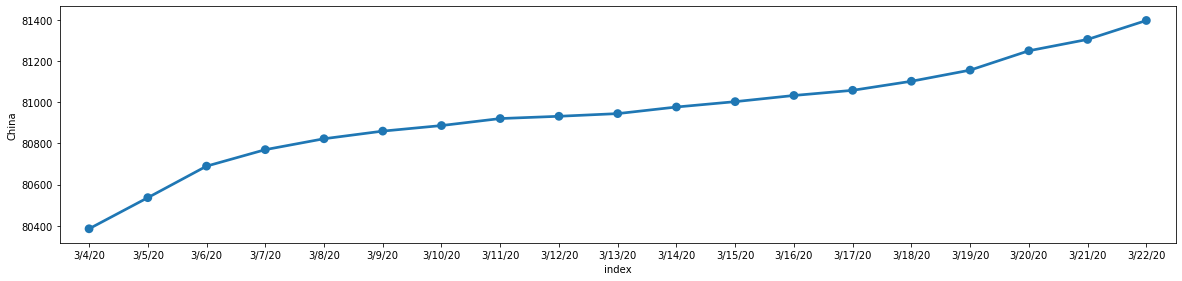

In [83]:
plt.figure(figsize=(20,20))
plt.subplot(4,1,1)
sns.pointplot(x=d_wise['index'],y=d_wise['China'])